### Import modules

In [1]:
import getpass
import sys
import time

from collections import defaultdict
from tqdm import tqdm, tqdm_notebook

import pandas as pd
import seaborn as sns

import matplotlib as mpl
import matplotlib.pyplot as plt
from matplotlib_venn import venn2
import string

In [2]:
%matplotlib inline

In [3]:
getpass.getuser()

'yojana'

### Loading data files

In [4]:
DATA_DIR = '../data'

In [5]:
plant_disease_data = pd.read_csv(
    f'{DATA_DIR}/processed/plant-disease/plant_disease_associations.tsv', sep='\t'
)
plant_disease_data.head(3)

,plant_curie,disease_curie,database,evidence
0,ncbitaxon:3369,mondo:0005324,bern2,10067319_8
1,ncbitaxon:3369,mondo:0005324,bern2,10094290_4
2,ncbitaxon:3369,mondo:0005324,bern2,10336604_1


In [6]:
plant_chemical_data = pd.read_csv(
    f'{DATA_DIR}/processed/plant-chemical/plant_chemical_harmonized_filtered_associations.tsv', sep='\t'
)
plant_chemical_data.head(3)

,plant_curie,chemical_curie,database,evidence
0,ncbitaxon:100136,pubchem.compound:73806653,coconut,Relation from COCONUT
1,ncbitaxon:100136,pubchem.compound:73201093,coconut,Relation from COCONUT
2,ncbitaxon:100136,pubchem.compound:97492,coconut,Relation from COCONUT


### Create subsets for each entities

In [7]:
### PLANT - DISEASE DATA

plants_in_bern2 = set(plant_disease_data[
    plant_disease_data['database'] == 'bern2'
]['plant_curie'])

plants_in_db = set(plant_disease_data[
    plant_disease_data['database'] != 'bern2'
]['plant_curie'])

diseases_in_bern2 = set(plant_disease_data[
    plant_disease_data['database'] == 'bern2'
]['disease_curie'])

diseases_in_db = set(plant_disease_data[
    plant_disease_data['database'] != 'bern2'
]['disease_curie'])

len(plants_in_bern2), len(plants_in_db), len(diseases_in_bern2), len(diseases_in_db)

(4826, 2393, 1811, 867)

In [8]:
### PLANT - CHEMICAL DATA

plants_in_coconut = set(plant_chemical_data[
    plant_chemical_data['database'] == 'coconut'
]['plant_curie'])

plants_in_lotus = set(plant_chemical_data[
    plant_chemical_data['database'] == 'lotus'
]['plant_curie'])

chemicals_in_coconut = set(plant_chemical_data[
    plant_chemical_data['database'] == 'coconut'
]['chemical_curie'])

chemicals_in_lotus = set(plant_chemical_data[
    plant_chemical_data['database'] == 'lotus'
]['chemical_curie'])

len(plants_in_coconut), len(plants_in_lotus), len(chemicals_in_coconut), len(chemicals_in_lotus)

(2689, 3422, 23477, 29121)

In [9]:
### PLANT - CHEMICAL TOTAL STATS

plants = plants_in_coconut.union(plants_in_lotus)
chemicals = chemicals_in_coconut.union(chemicals_in_lotus)
len(plants), len(chemicals)

(3951, 46655)

### Getting plant-chemical and plant-disease distribution

In [10]:
plant_disease_dict = defaultdict(set)

for plant_curie, disease_curie, db_name, pmid in tqdm(
    plant_disease_data.values, desc='Plant-disease dictionary'
):
    plant_disease_dict[plant_curie].add(disease_curie)
    
plant_chemical_dict = defaultdict(set)

for plant_curie, chemical_curie, db_name, pmid in tqdm(
    plant_chemical_data.values, desc='Plant-chemical dictionary'
):
    plant_chemical_dict[plant_curie].add(chemical_curie)

Plant-chemical dictionary: 100%|████████████████████████████████████████████████████████████████████████████████████████████████| 142742/142742 [00:00<00:00, 476967.42it/s]


In [11]:
plant_disease_distribution = [
    len(disease_set)
    for plant_name, disease_set in plant_disease_dict.items()
]

plant_chemical_distribution = [
    len(chemical_set)
    for plant_name, chemical_set in plant_chemical_dict.items()
]

### Venn Diagrams

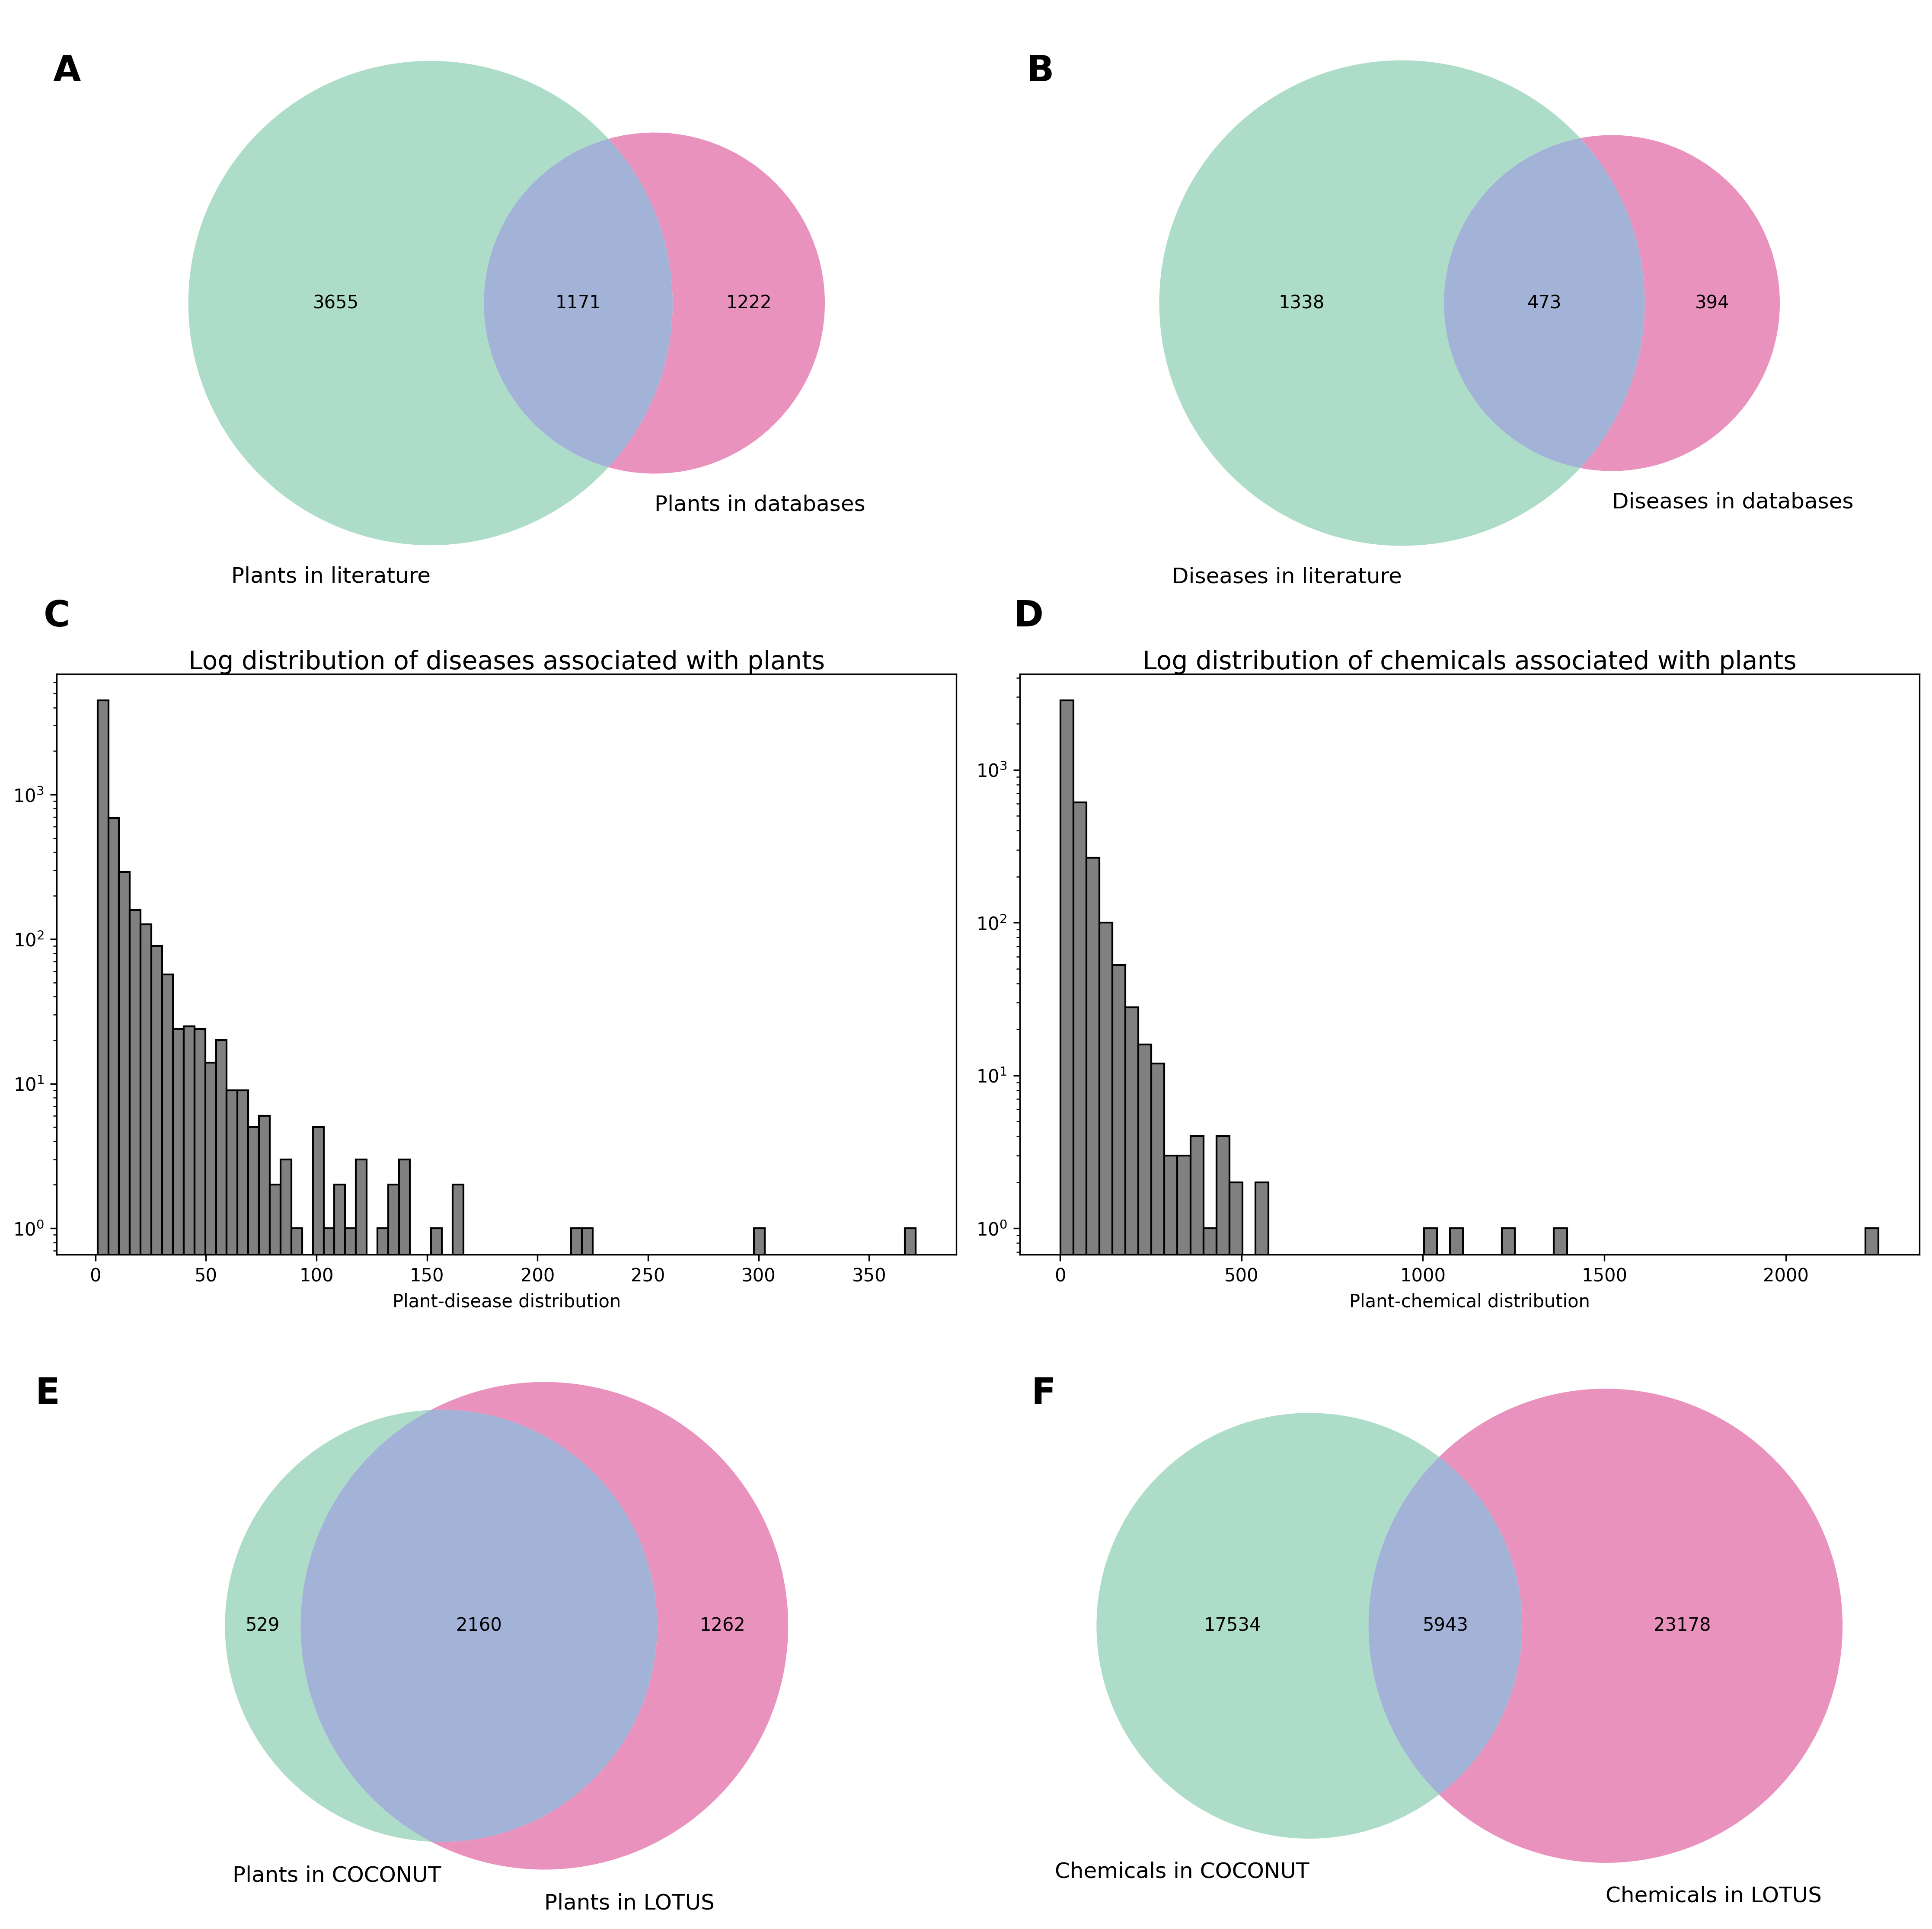

In [12]:
plt.figure(dpi=300, figsize=([15,15]))

plt.subplots_adjust(wspace=0)

plt.subplot(3,2,1)
c1 = venn2(
    [plants_in_bern2, plants_in_db],
    set_labels=('Plants in literature', 'Plants in databases'),
    set_colors=('#8BCEB2', '#E165A2'),
    alpha=.7
)
c1.get_patch_by_id('11').set_color('#7C94C7')
c1.get_patch_by_id('11').set_edgecolor('none')
plt.text(-0.1, 0.9, string.ascii_uppercase[0],  
        size=20, weight='bold', horizontalalignment='center',
        verticalalignment='center',
        transform = plt.gca().transAxes)

plt.subplot(3,2,2)
c2 = venn2(
    [diseases_in_bern2, diseases_in_db],
    set_labels=('Diseases in literature', 'Diseases in databases'),
    set_colors=('#8BCEB2', '#E165A2'),
    alpha=.7
)
c2.get_patch_by_id('11').set_color('#7C94C7')
c2.get_patch_by_id('11').set_edgecolor('none')
plt.text(-0.1, 0.9, string.ascii_uppercase[1],  
        size=20, weight='bold', horizontalalignment='center',
        verticalalignment='center',
        transform = plt.gca().transAxes)

plt.subplot(3,2,3)
plt.hist(plant_disease_distribution, bins=76, ec='black', color='grey')
plt.yscale("log")
plt.xlabel('Plant-disease distribution')
plt.title('Log distribution of diseases associated with plants',horizontalalignment='center', size=14,
        verticalalignment='center')
plt.text(0, 1.1, string.ascii_uppercase[2],  
        size=20, weight='bold', horizontalalignment='center',
        verticalalignment='center',
        transform = plt.gca().transAxes)

plt.subplot(3,2,4)
plt.hist(plant_chemical_distribution, bins=63, ec='black', color='grey')
plt.yscale("log")
plt.xlabel('Plant-chemical distribution')
plt.title('Log distribution of chemicals associated with plants', horizontalalignment='center', size=14,
        verticalalignment='center')
plt.text(0.01, 1.1, string.ascii_uppercase[3],  
        size=20, weight='bold', horizontalalignment='center',
        verticalalignment='center',
        transform = plt.gca().transAxes)

plt.subplot(3,2,5)
c3 = venn2(
    [plants_in_coconut, plants_in_lotus],
    ('Plants in COCONUT', 'Plants in LOTUS'),
    set_colors=('#8BCEB2', '#E165A2'),
    alpha=.7
)
c3.get_patch_by_id('11').set_color('#7C94C7')
c3.get_patch_by_id('11').set_edgecolor('none')
plt.text(-0.2, 0.9, string.ascii_uppercase[4],  
        size=20, weight='bold', horizontalalignment='center',
        verticalalignment='center',
        transform = plt.gca().transAxes)

plt.subplot(3,2,6)
c4 = venn2(
    [chemicals_in_coconut, chemicals_in_lotus],
    ('Chemicals in COCONUT', 'Chemicals in LOTUS'),
    set_colors=('#8BCEB2', '#E165A2'),
    alpha=.7
)
c4.get_patch_by_id('11').set_color('#7C94C7')
c4.get_patch_by_id('11').set_edgecolor('none')
plt.text(0, 0.9, string.ascii_uppercase[5],  
        size=20, weight='bold', horizontalalignment='center',
        verticalalignment='center',
        transform = plt.gca().transAxes)

plt.tight_layout()
plt.savefig(f'{DATA_DIR}/figures/figure_1.png', bbox_inches='tight')
plt.show()